In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import EarlyStopping

In [4]:
file_path = '/content/drive/MyDrive/color/'
test_file_path = '/content/drive/MyDrive/test_color'

datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.4,
    horizontal_flip = True,
    validation_split = 0.2
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = datagen.flow_from_directory(
    file_path,
    target_size=(225, 225),
    batch_size = 16,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    file_path, # same directory as training data
    target_size = (225, 225),
    batch_size = 16,
    class_mode = 'binary',
    subset = 'validation')

test_generator = datagen.flow_from_directory(
    test_file_path,
    target_size=(225, 225),
    batch_size = 1,
    class_mode='binary')

Found 607 images belonging to 14 classes.
Found 144 images belonging to 14 classes.
Found 13 images belonging to 14 classes.


In [5]:
categorical = {
    0.0 : 'black',
    1.0 : 'blue',
    2.0 : 'brown',
    3.0 : 'gray',
    4.0 : 'green',
    5.0 : 'navy',
    6.0 : 'orange',
    7.0 : 'pink',
    8.0 : 'purple',
    9.0 : 'red',
    10.0 : 'skyblue',
    11.0 : 'violet',
    12.0 : 'white',
    13.0 : 'yellow'
}

Text(0.5, 1.0, 'skyblue')

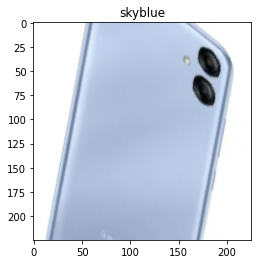

In [6]:
image, label = next(iter(train_generator))

plt.figure(figsize = (4,4))
plt.imshow(image[0])
plt.title(categorical[label[0]])

In [10]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(225, 225, 3)),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(14, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 223, 223, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 394272)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               50466944  
                                                                 
 dense_3 (Dense)             (None, 14)                1806      
                                                                 
Total params: 50,469,646
Trainable params: 50,469,646
Non-trainable params: 0
__________________________________________

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

hist = model.fit(train_generator, epochs=25, validation_data=validation_generator, callbacks=[earlystopping])

Epoch 1/25
38/38 [==============================] - 18s 470ms/step - loss: 9.7582 - accuracy: 0.2026 - val_loss: 2.3408 - val_accuracy: 0.3056
Epoch 2/25
38/38 [==============================] - 18s 473ms/step - loss: 2.1501 - accuracy: 0.3558 - val_loss: 1.9620 - val_accuracy: 0.4028
Epoch 3/25
38/38 [==============================] - 19s 490ms/step - loss: 1.7572 - accuracy: 0.4596 - val_loss: 1.7019 - val_accuracy: 0.4236
Epoch 4/25
38/38 [==============================] - 17s 458ms/step - loss: 1.5270 - accuracy: 0.5470 - val_loss: 1.6265 - val_accuracy: 0.5139
Epoch 5/25
38/38 [==============================] - 17s 461ms/step - loss: 1.3207 - accuracy: 0.5750 - val_loss: 1.4347 - val_accuracy: 0.5278
Epoch 6/25
38/38 [==============================] - 17s 457ms/step - loss: 1.2045 - accuracy: 0.5931 - val_loss: 1.4807 - val_accuracy: 0.5139
Epoch 7/25
38/38 [==============================] - 18s 465ms/step - loss: 1.1675 - accuracy: 0.6063 - val_loss: 1.4210 - val_accuracy: 0.5208

In [12]:
test_generator.reset()
output = model.predict_generator(test_generator)

y_predict = np.argmax(output, axis = 1)
y_predict

<ipython-input-12-f97fc3d79793>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  output = model.predict_generator(test_generator)


array([ 7, 13, 11,  6, 12,  1,  3,  3,  2,  3,  1, 10,  5])

In [13]:
loss, acc = model.evaluate_generator(test_generator)
print('Accuracy : ', str(np.round(acc, 2) * 100) + '%')

<ipython-input-13-cd0eba8ff52a>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = model.evaluate_generator(test_generator)


Accuracy :  46.0%
